<h1> 1. Análisis de Toneladas Netas - Maíz </h1>

<h2> 1.1 Código </h2>

Primero vamos a cargar **Librerías** que ocuparemos en el documento

In [31]:
library(ggplot2)
library(xts)
library(forecast)
library(dplyr)
library(tseries)
library(zoo)
library(quantmod)
library(TTR)

Cargamos la dirección en donde tenemos nuetros formatos csv.

In [2]:
setwd("C:\\Users\\81799\\OneDrive\\Documentos\\ESFM_CLASES\\Servicio Social ARTF\\Machine Learning\\section1\\ARTF_2017_2020\\ABRIL_ARTF")

**Código Serie Temporal**: Estas lineas nos servirán para hacer el gráfico de la serie temporal de los 5 productos con mayor volumen de carga y poder hacer los pronósticos adecuados.

In [3]:
Ton_Netas_P <- read.csv("Toneladas_Netas__Productos_2014_2022.csv")
Ton_Netas_P <- Ton_Netas_P[-99,]
Ton_Netas_P$X <- as.yearmon(as.factor(Ton_Netas_P$X), format ="%m/%Y")
T_N_Pro  <- Ton_Netas_P # Contiene las fechas
Ton_Netas_P <- xts(Ton_Netas_P[,c(2:6)], order.by = Ton_Netas_P$X )
T_N_P <-  data.frame(Ton_Netas_P) #Ordeno por fechas y la trae como indice
color_T_N_P <- rainbow(ncol(Ton_Netas_P))
serie_temporal_Toneladas_netas_Producto <- plot.xts(Ton_Netas_P , col = color_T_N_P , 
         legend.loc = "topleft" , lwd = 2,
         cex = 0.5, ylab = "Toneladas netas", xlab ="Tiempo",
         cex.axis = 0.7,
         main = "Toneladas Netas - Productos ") #Gráfica de serie temporal

**Código Histograma Total** : Estas líneas nos servirán para poder hacer el histograma de frecuencias aboslutas donde se muestran cuales son los 5 productos con mayor volumen desde Enero/2014 a Febrero/2022

In [4]:
His_T_Ton_Pro <- read.csv("Histograma_Total_Ton_Netas_Producto.csv" )
Histograma_Total_Ton_Netas_Producto <-  ggplot(His_T_Ton_Pro, aes(x=PRODUCTOS, y=TOTAL, label =scales::comma(TOTAL),fill = PRODUCTOS ))+
  geom_bar(show.legend = T, stat = "identity" )+
  labs(title = "Total de toneladas netas por producto de Enero/2014 a Febrero/2022",
       x = "Productos", y= "Toneladas Netas")+
  scale_y_continuous(labels = scales::comma )+
  theme(legend.position = "bottom", legend.text = element_text(size=8),
        legend.title =element_text(size = 0, color = "black"),
        axis.text.x = element_text(size = 0))+
  scale_fill_manual(values =c("olivedrab2", "green1", "purple", "red1","blue1"))+
  geom_text(size=4, position = position_stack(vjust = 1.1))

**Código Histograma Desglose**: Este código nos muestra un desglose de los productos con mayor volumen de carga en donde mostraré la cantidad que se transporto año con año.

In [5]:
#Histograma Toneladas - Producto (Desglose)
His_D_Ton_Pro <- read.csv("Histograma_Desglose_Ton_Netas_Producto.csv" )
Histograma_Desglose_Ton_Netas_Producto <- ggplot(His_D_Ton_Pro , aes(x=PRODUCTOS, y=TOTAL, label =scales::comma(TOTAL),fill = AÑO ))+
  geom_bar(show.legend = T, stat = "identity")+
  labs(title = "Total de toneladas netas por producto desde Enero/2014 a Feb/2022")+
  scale_y_continuous(labels = scales::comma )+
  geom_text(size=4, position = position_stack(vjust = 0.5), color = "white" )+theme_dark()

**Código Estadística Descriptiva**: Este código es de gran ayuda paraa saber el mínimo, máximo y promedio del crecimiento de cada producto, esto con la finalidad de saber en que año tuvo un mayor y menor crecimiento,

In [6]:
Estadistica_Descriptiva_Ton_Netas_Producto <- read.csv("Estadistica_Descriptiva_Ton_Netas_Producto.csv")[,-1]

**Código Gráficas**: Este código es de gran ayuda para graficar cada producto por separado.

In [7]:
Grafica_Maiz <- plot.xts(Ton_Netas_P[,1] , col = color_T_N_P ,
legend.loc = "topleft" , lwd = 2,
cex = 0.5, ylab = "Toneladas netas", xlab ="Tiempo",
cex.axis = 0.7,
main = "Toneladas Netas - Productos ")

**Código Componente de las series** : Las líneas del siguiente código nos ayudarán para realizar una gráfica que descomponga la serie de los productos en sus respectivos componentes.

MAÍZ

In [8]:
Maiz_ts <- ts(T_N_P[,1], frequency = 12, star = c(2014,1))
Maiz <- data.frame(Maiz_ts)
Decom_Maiz <- decompose(Maiz_ts)
Grafica_Decom_Maiz_aditiva  <-  autoplot(Decom_Maiz)+
labs(title = "Toneladas Netas - Productos de Maíz (Por componentes)",
x="Período (Mensual)", y="")+theme_gray()

**Código Grafico de Tendencia y Serie Original** : Las líneas del siguiente código nos ayudarán para realizar una gráfica en donde estarán la tendencia (dada por la función *decompose()*) y los datos originales.

MAÍZ

In [9]:
Decom_Maiz_aditiva_y_Serie_original_Maiz <- cbind(Maiz_ts,Decom_Maiz$trend) 

**Código Tendencia:** El siguiente código nos sirve para poder solamente visualizar la tendencia de cada producto.

MAÍZ

In [10]:
Tendencia_Maiz  <-  autoplot(Decom_Maiz$trend)+
labs(title = "Toneladas Netas - Productos de Maíz (Por componentes)",
x="Período (Mensual)", y="")+theme_grey()

**Código para Promedio Móvil Simple**: El siguiente código nos sirve para poder pronósticar la serie original a través del método de medias simple

MAÍZ

In [11]:
Maiz_SMA <- SMA(Maiz_ts,n=2) #Promedio hacia atras
Maiz_Suavizados <- cbind(Maiz_ts,Maiz_SMA) #Para hacer la gráfica
MM_Maiz<-T_N_P %>% select(0, MAÍZ) %>% mutate("5-MA"=rollmean(MAÍZ,k=5,fill=NA)) #Promedio dado y_t en medio
m5_MA <- ts(MM_Maiz[,2], frequency =12 , start=c(2014,1)) #Para poder graficar 5-MA lo convertimos en class ts
Maiz_ts_y_5_MA <- cbind(Maiz_ts, m5_MA)

<h2> 1.2 Análisis </h2>

Realizando un histograma de frecuencias absolutas (La tabla dada ya pasó por un filtrado en donde se quedan con los 5 productos con mayor volumen de carga) para ver cuales son los 5 productos con mayor volumen de carga.

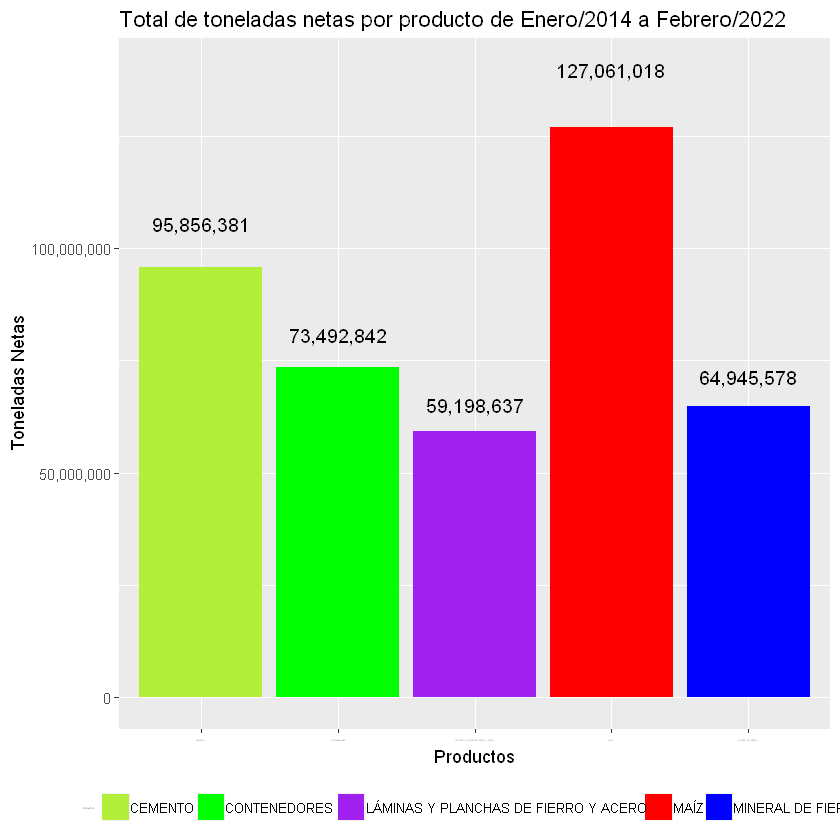

In [12]:
Histograma_Total_Ton_Netas_Producto

 En la cual podemos observar que los productos con mayor volumen de carga ordenados de forma descdenten quedan de la siguiente manera: 
 1. Maíz con 127,061,018 
 2. Cemento con 95,856,381
 3. Contenedores con 73,492,892
 4. Mineral de Fierro con 64,945,578
 5. Láminas, Planchas de Fierro y Acero con 59,198,637 
 
 
 Haciendo el mismo histograma de frecuencias absolutas con la diferencia de que ahora vamos a poner en el histograma el comportamiento del producto respecto a las tonelads netas transportadas año con año.

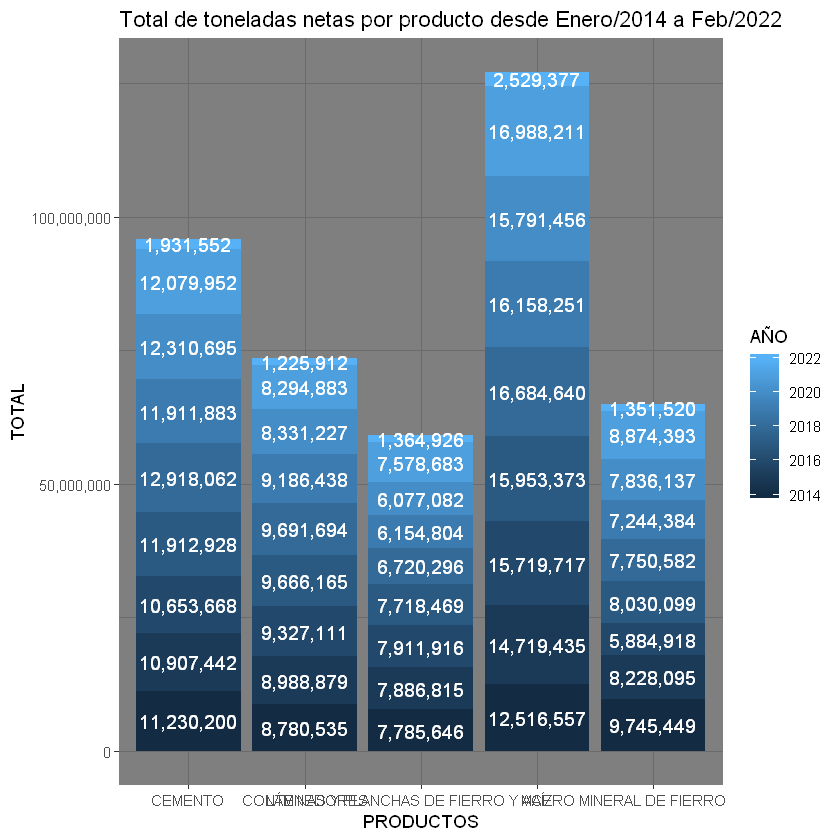

In [13]:
Histograma_Desglose_Ton_Netas_Producto

Con la siguiente tabla podemos completar el histograma anterior:

In [14]:
Estadistica_Descriptiva_Ton_Netas_Producto

Descripcion,MAIZ,CEMENTO,MINERAL,LAMINAS,CONTENEDORES
Mín. Ton. netas,12516557,10653668,5884918,6077082,8294883
Fecha de min. Ton. netas,2014,2016,2016,2020,2021
Max. Ton. netas,16988211,12918062,9745449,7911916,9691694
Fecha de max. Ton. netas,2021,2018,2014,2016,2018
Promedio Ton. netas,15566455,11740604,7949257,7229214,9033366


Un pequeño análisis del comportamiento, por ejemplo del MAÍZ,  es que el año en donde tuvo menores toneladas netas fue en 2014 con un total de $12,516,557$ y en donde tuvo un máximo de Toneladas Netas fue en 2021 con un total de $16,988,211$. Otra observación es que de Enero/2014 a Diciembre/2021 se transporta en promedio $15,566,455$ toneladas netas del maíz por año.

Dado un análisis previo acerca del comportamiento de los 5 productos con mayor volumen, procedemos a realizar el gráfico de la serie temporal de dichos productos.

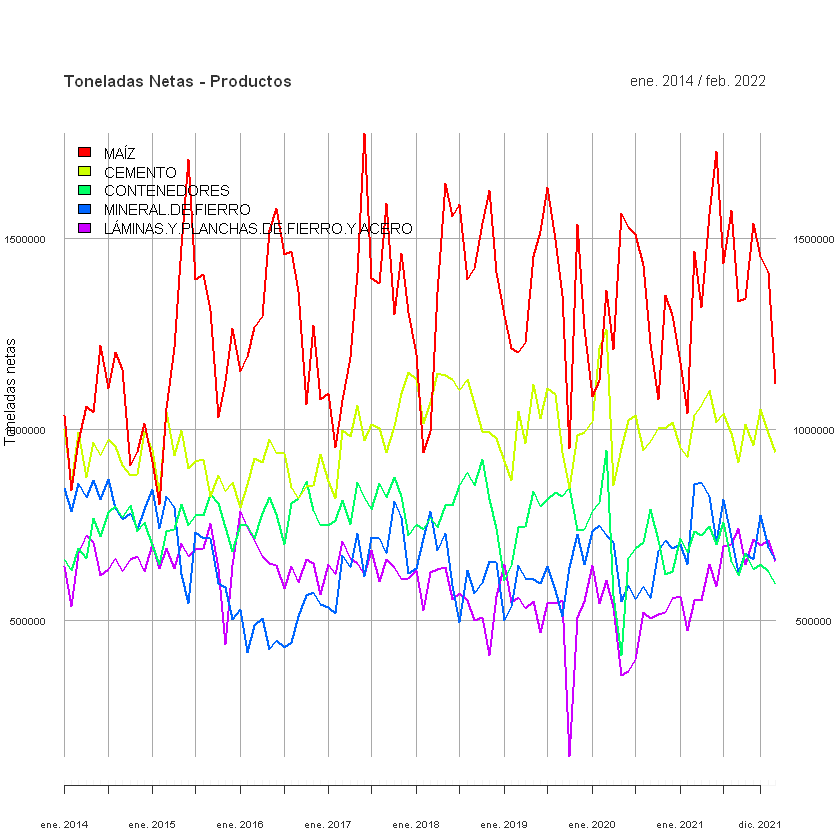

In [15]:
serie_temporal_Toneladas_netas_Producto

<h2> 1.3 MAÍZ </h2>

<h3> 1.3.1 Parcelas estacionales </h3> <br> Una **gráfica estacional** es similar a una gráfica de tiempo, excepto que los datos se grafican contra las "estaciones" individuales en las que se observaron los datos. Analicemos la siguiente serie de tiempo. 

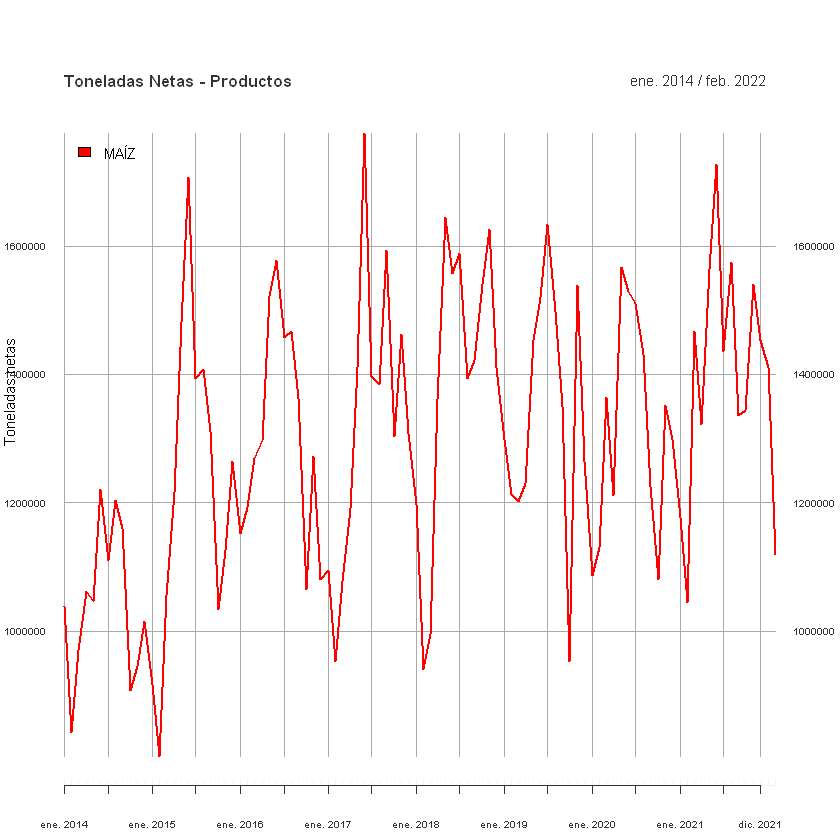

In [16]:
Grafica_Maiz 

Ahora haciendo su gráfica estacional, tenemos lo siguiente:

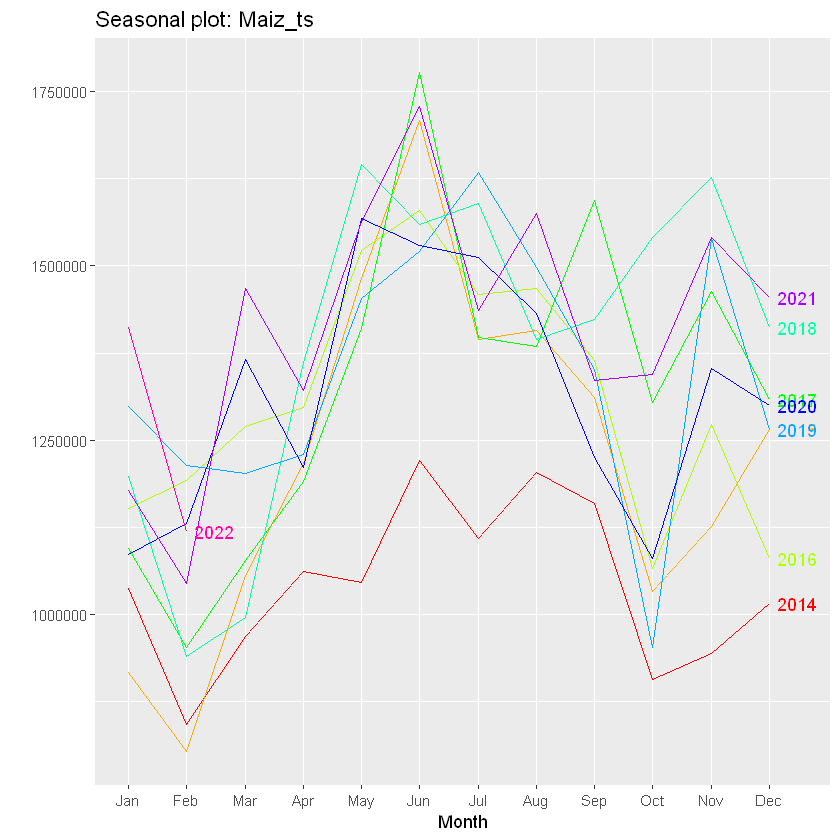

In [17]:
ggseasonplot(Maiz_ts,  year.labels =T, col = rainbow(9)) #Gráfica las parcelas estacionales.

Estos son los mismos datos que se mostraron anteriormente, pero los datos de cada temporada se superponen. Un **gráfico estacional** permite ver más claramenete el patrón estacional subyacente y es especialmente útil para identificar los años en los que cambia el patrón.

<h3> 1.3.3 Gráfica de subseries estacionales </h3> <br> Una gráfica alternatuva que enfatiza los patrones estacionales es donde los datos de cada temporada se recopilan juntos en mini gráficas de tiempo serparadas. 

Una gráfica de subserie estacional faceta la serie temporal por cada estación en el período estacional. Esta faceta forman gráficos de series de tiempo más pequeños que consisten en datos solo de esa temporada. Si tuviera varios años de datos (mensuales, trimestrales, diarios, anuales, etc), el gráfico resultante mostraría un gráfico de serie de tiempo separado por cada período (ya sea mes, año, días) que se este trabajando la serie de tiempo.

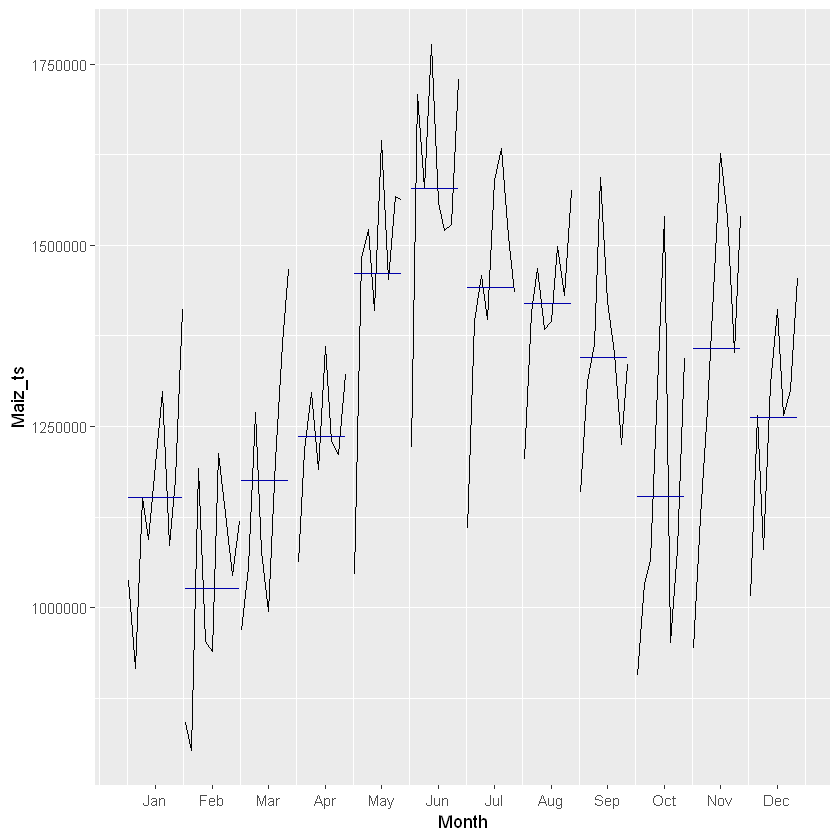

In [18]:
ggsubseriesplot(Maiz_ts)

**Las lineas horizontales azules** indican las meidas de cada mes. Esta forma de gráfico permite ver claramente el patrón estacional subyacente y también muestra los cambios en la estacionalidad a lo largo del tiempo. Es especialmente útil para identificar cambios dentro de estaciones particulares.
Notemos que la serie de tiempo esta dada en forma mensual, es por eso que hace un gráfico estacional separado por mes.

<h3> 1.3.4 Componente generales de la serie Maíz </h3>

 Al describir las series temporales, podremos encontrar palabras como "tendencia" y "estacionalidad", las cuales se definen de la siguiente manera: 

**Tendencia:** Una *tendencia* existe cuando hay un aumento o disminución a largo plazo en los datos. No tiene que ser lineal. A veces nos referiremos a una tendencia como "cambio de dirección", cuando podría pasar de una tendencia creciente a una tendencia decreciente.  <br>

**Estacional:** Un patrón *estacional*  ocurre cuando una serie de tiempo se ve afectada por factores estacionales como la época del año o el día de la semana. La estacionalidad es siempre de un período fijo y conocido. <br>

**Cíclico:** Un *ciclo* ocurre cuando los datos exhiben subidas y bajadas que no tienen una frecuencia fija. Estas fluctuaciones generalmente se deben a las conidiciones económicas y, a menudo, están relacionadas con el "ciclo económico".


Mucha gente confunde el comportamiento cíclico con el comportamiento estacional, pero en realidad son bastantes diferentes. Si las fluctuaciones no son de una frecuencia fija entonces son cíclicas; si la frecuencia no cambia y está asociada con algún aspecto del calendario, entonces el **patrón es estacional**. En general, la duración media de los ciclos es mayor que la duración de un patrón estacional. y las magnitudes de los ciclos tienden a ser más variables que las magnitudes de los patrones estacionales. Muchas series de tiempo incluyen tendencia, ciclos y estacionalidad. Al elegir un método de pronóstico, primero necesitaremos identificar los patrones de series de tiempo en los datos y luego elegir un método que pueda capturar los patrones correctamente.

Si asumimos una **descomposición aditiva**, entonces podemos escribir: $$y_t=S_t+T_t+R_t$$ Donde: 
* $y_t$ son los datos.
* $T_t$ es el componete de ciclo de tendencia.
* $R_t$ es el comportamiento restante.

todo en el período $t$. Alternativamente, una **descomposición multiplicativa** se escribiría como: $$y_t=S_t\cdot T_t \cdot R_t$$

La **descomposición aditiva** es la más adecuada si la magnitud de las fluctuaciones estacionales, o la variación en torno a la tendencia-ciclo, no varía con el nivel de la serie temporal. Cuando la variación alrededor del ciclo tendenci, parece ser proporcionadal al nivel de la serie temporal, entonces es más apropiada una **descomposición múltiplicativa** . Las descomposciones multiplicativas son comunes con las series temporales económicas.

Una alternativa al uso de una descomposición multiplicativa es primero transofrmar los datos hasta que la variación en la serie parezca estable a lo largo del tiempo y luego usar una descomposición aditiva. Cuando se ha usado una transformación logarítmica, esto es equivalente a usar una descomposición multiplicativa porque: 

$y_t=S_t\cdot T_t \cdot R_t$ es equivalente a $log\;y_t =log\; S_t+log \;T_t +log\; R_t$


Visualizando de mejor manera las diferencias entre los componentes qque integran la serie de tiempo
(MAIZ), hacemos lo siguiente:

<h3> 1.3.5 Descomposición por la función decompose() de R </h3>

Utilizando la función *decompose()* en tipo aditiva de $R$, tenemos lo siguiente:

In [19]:
Decom_Maiz

$x
           Jan       Feb       Mar       Apr       May       Jun       Jul
2014 1037733.6  841936.6  968867.5 1061894.8 1046361.4 1220890.4 1109470.9
2015  916324.4  803495.1 1055547.1 1216488.3 1481237.2 1708447.4 1394690.7
2016 1151765.0 1192223.4 1269109.9 1296962.5 1522123.0 1579058.8 1458302.9
2017 1094419.1  952764.9 1077635.7 1190780.7 1410637.8 1777352.4 1397730.8
2018 1197400.4  939691.1  995145.6 1361005.3 1645195.0 1558841.7 1589994.9
2019 1298361.2 1213312.8 1202920.1 1230037.4 1453447.6 1520640.7 1634203.5
2020 1086484.4 1130574.9 1365206.0 1211035.2 1567916.6 1529451.7 1511977.6
2021 1177533.1 1043996.2 1467083.3 1321736.0 1563662.3 1728951.7 1435664.5
2022 1410967.6 1118409.3                                                  
           Aug       Sep       Oct       Nov       Dec
2014 1203979.7 1159457.2  906492.2  943968.5 1015504.7
2015 1407658.0 1311686.6 1033417.1 1125823.7 1264619.4
2016 1467896.1 1363641.1 1065388.9 1273013.8 1080231.7
2017 1384385.5 1593865.6 13

El resultado anterior muestra los componentes de una descomposición dada la función *decompose()* de $R$. 
Podemos graficar todos los componentes en una sola figura de la siguiente manera:



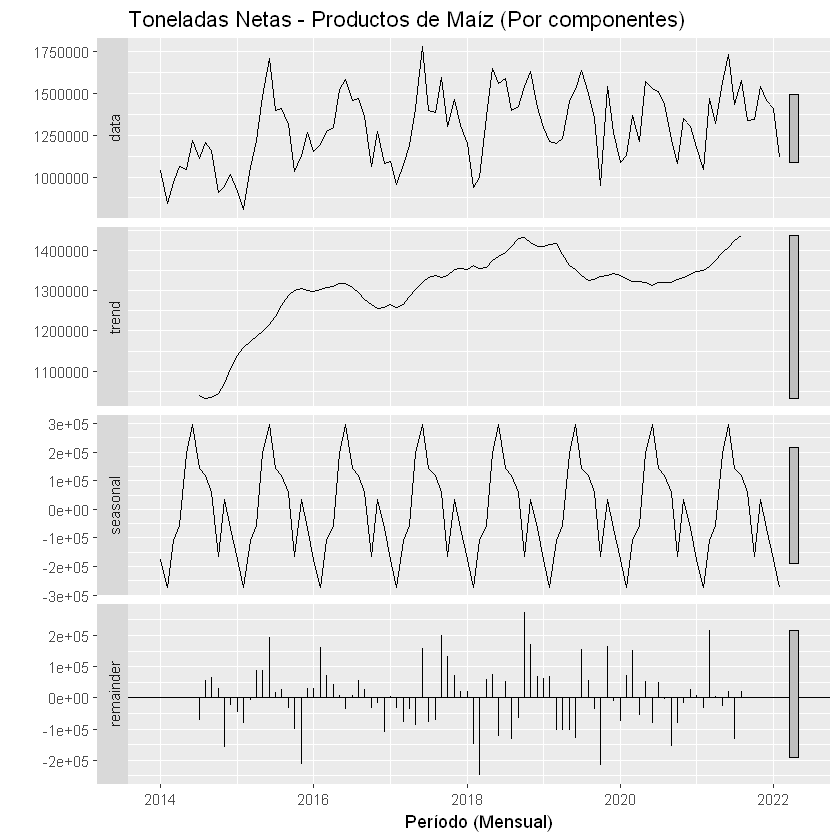

In [20]:
Grafica_Decom_Maiz_aditiva

La **trend** columna (que contiene la tendencia-ciclo $T_t$) que sigue el movimiento general de la serie, ignorando cualquier estacionalidad y fluctuaciones aleatorias. Como se muestra en la siguiente gráfica


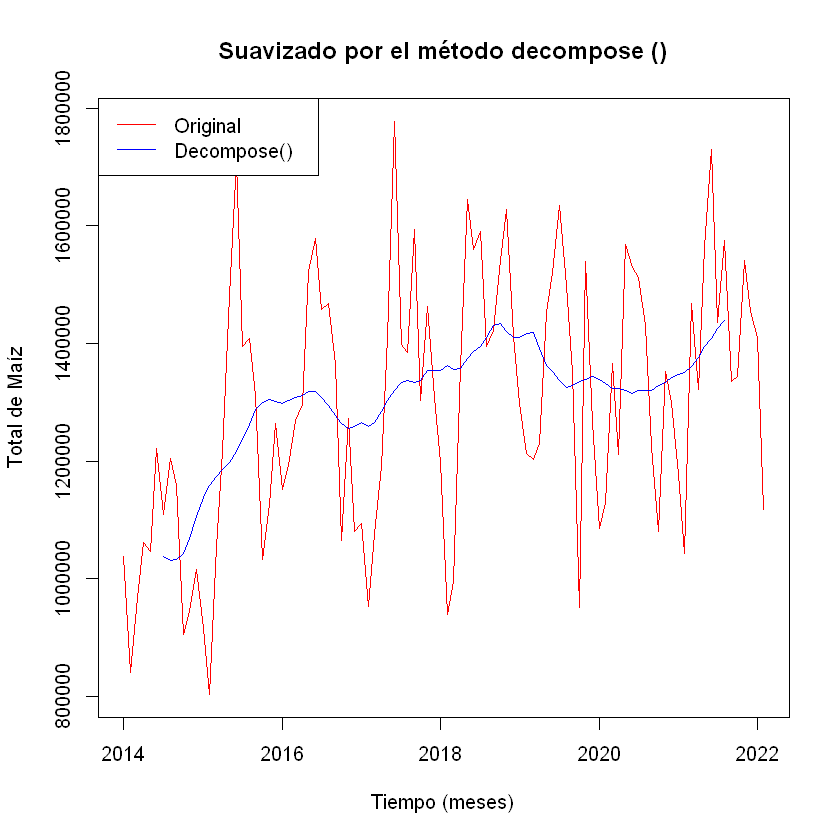

In [21]:
plot(Decom_Maiz_aditiva_y_Serie_original_Maiz, plot.type = "single",
                                                  col = c("red","blue"),lwd=1:1 , lty=1:1, ylab = "Total de Maíz",
                                                  xlab = "Tiempo (meses)", main = "Suavizado por el método decompose ()")
legend(x="topleft", legend =c("Original", "Decompose()"),col =c("red", "blue"),lty=1:1)
                                        

Podemos comprender a la **tendencia** de la serie de tiempo del maiz como el comportamiento a largo
plazo de la serie. Visualizando únicamente la tendencia, tendremos lo siguiente:

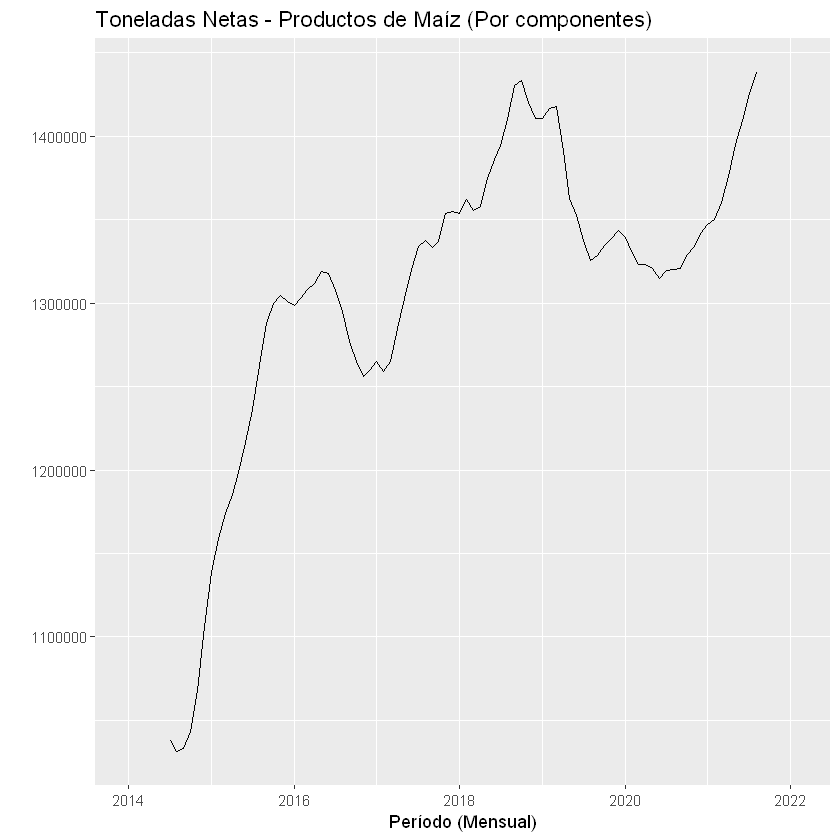

In [22]:
Tendencia_Maiz

Podemos observar que la tendencia tuvo un comportamiento sostenido en la gran parte del período,
esta también tuvo un importante cambio alrededor de Julio-2016 a Diciembre-2016 y Febrero-2019 a
Octubre-2019, donde prácticamente paso de tener un comportamiento creciente a uno decreciente.

<h3> 1.3.6 Análisis de correlograma </h3>

El análisis del correlograma es una opción que nos ayudaráa bastante a analizar la interdependencia
de los valores de observación. La idea con la que debemos conservar al manejar correlogramas es que
sirven para describir la presencia o ausencia de correlación en los datos de las series temporales,
indicando si las observaciones pasadas inluyen en las actuales.
Ahora veremos la correlación que tienen los datos , es decir, una correlación mide el nivel de semejanza
entre una secuencia de hace varios períodos y datos actuales. La secuencia de hace varios períodos
atrás se llama "retraso" o "lag" en inglés, porque es una versión retrasada de la original.

Dada una serie de tiempo $Y_t$, se define su **función de auto-correlación de retraso k** como: $$\varphi _k(t)=corr(Y_t,Y_{t-k})$$ 


Así como la **correlación** mide el alcance de una relación lineal entre dos variables, la **autocorrelación** mide la relación lineal entre los *valores rezagados* de una serie de tiempo. Hay varios coeficiente de autocorrelación, correspondientes a cada panel en el gráfico de retardo, es decir, $\varphi _k(t)=corr(y_t,y_{t-k})$ Por ejemplo, $\varphi _1(t)$ mide la relación entre $y_1$ y $y_{t-1}$, $\varphi _2(t)$ mide la relación entre $y_t$ y $y_{t-2}$, y así sucesivamente. El valor de $\varphi _k(t)$ se úede escribir como  $$ \varphi _k =\frac{\sum \limits _{t=k+1}^T (y_t-\bar{y})(y_{t-k}-\bar{y}) }{\sum \limits _{t=1}^T (y_t-\bar{y})^2} $$ donde $T$ es la duración de la serie temporal. Los coeficientes de autocorrelación componen la *función de autocorrelación* o **ACF**


Las dos funciones de **auto-correlación** que podemos manejar en los pronósticos de Series de Tiempo son: 
1. **Función de Auto-correlación simple**: Mide la autocorrelación entre dos variables separadas por $k$ períodos, o , en otras palabras, el grado de asociación lineal que existe entre dos variables del mismo proceso aleatorio.
2. **Función de Auto-Correlación parcial**: Mide la auto-correlación entre dos variables separadas $k$ períodos cuando no se considera la presendecia de la dependencia creada por los retardos intermedios que hay entre mbas. En otras palabras, esta encuentra la auto-correlación que existe entre dos variables separadas $k$ períodos descontando los posibles efectos debidos a las variables intemedias. 




<h3> 1.3.6.1 Autocorrelación simple </h3>

En seguida se darán los valores y el gráfico de las auto-correlaciones simples del Maiz


Autocorrelations of series 'ts(Maiz_ts)', by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000  0.608  0.359  0.157 -0.032 -0.088 -0.058 -0.115 -0.079  0.039  0.210 
    11     12     13     14     15     16     17     18     19     20     21 
 0.342  0.547  0.360  0.124 -0.055 -0.135 -0.191 -0.141 -0.184 -0.149 -0.065 
    22     23     24     25     26     27     28     29     30     31     32 
 0.075  0.214  0.353  0.236  0.127 -0.026 -0.101 -0.073 -0.068 -0.126 -0.086 
    33     34     35     36 
-0.039  0.097  0.239  0.314 

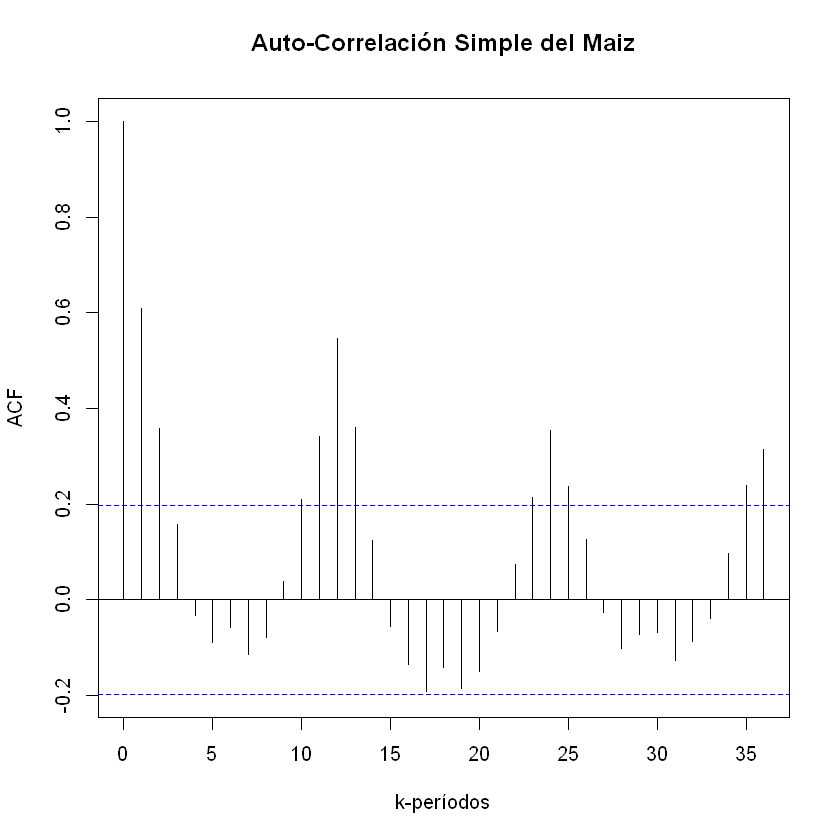

In [23]:
(acf(ts(Maiz_ts), lag.max=36, 
     main = "Auto-Correlación Simple del Maiz",
xlab ="k-períodos"))

Dado los valores y la gráfica de auto-correlación simple, tenemos que $\varphi _1 =0.608$ y $\varphi _{12}=0.547$, es decir , es conveniente predecir el futuro ya sea con $1$ o $12$ retrasos (Entre más cercano a 1 es mejor). Lo anterior lo podremos expresar de la siguiente manera:

$\varphi _1(t)=corr(X_t,X_{t-1})=0.608$ 

$\varphi _{12}(t)= corr(X_t,X_{t-12})=0.547$

**Tendencia y estacionalidad en parcelas ACF**

* Cuando los **datos tienen una tendencia**, las autocorrelaciones para pequeños retrasos tienden a ser grandes y positivas porque las observaciones cercanas en el tiempo también tienen un valor cercano. Entonces, **el *ACF* de una serie de tiempo con tendencia tiende a tener valores positivos que disminuyen lentamente a medida que aumentan los retrasos.**

* Cuando los **datos son estacionales**, las autocorrelaciones serán mayores para los retrasos estacionales (en múltiplos de período estacional) que para otros retrasos.

* Cuando los **datos son de tendencia y estacionales**, se ve una combinación de estos efectos.

<h3> 1.3.6.2 Gráficas de retraso </h3>

Un gráfico de retraso es un tipo especial de gráfico de dispersión en el que el eje $x$ representa el conjunto de datos con algunas unidades de tiempo atrás o adelante en comparación con el eje $y$. La diferencia entre estas unidades de tiempo se llama retraso y se representa por $k$

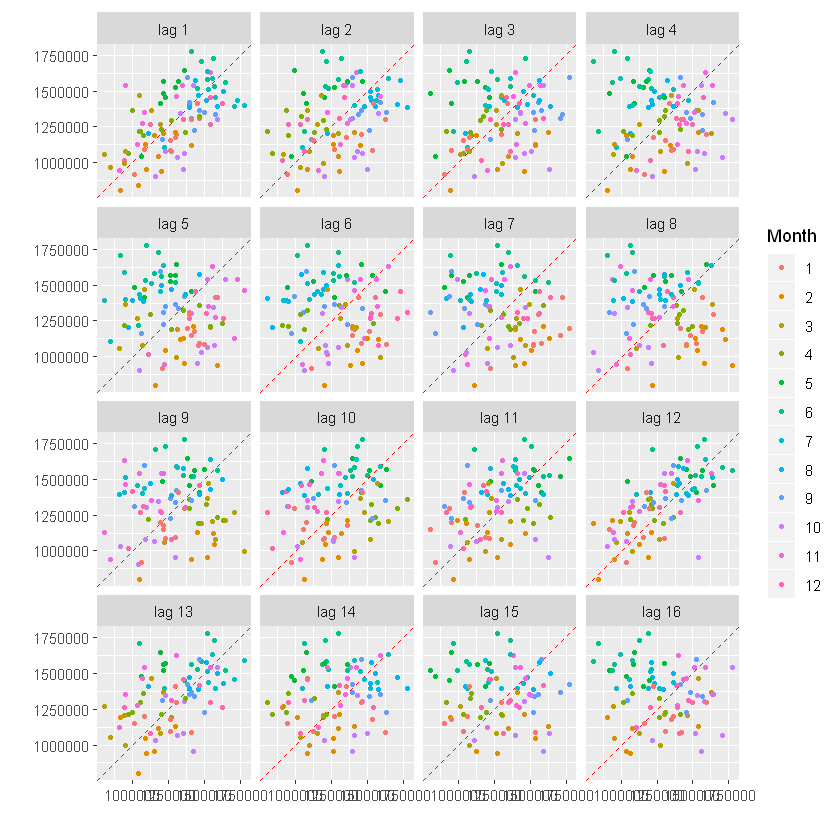

In [24]:
gglagplot(Maiz_ts, do.lines =FALSE , diag = TRUE , diag.col = "red")

La relación es fuertemente positiva en el rezago $1$ y $12$ (  $\varphi _1$ y $\varphi _{12}$ ) lo que refleja la fuerte estacionalidad de los datos.

<h3> 1.3.6.3 Autocorrelación parcial </h3>

En seguida se darán los valores y la gráfica de *auto-correlación parcial* del Maiz


Partial autocorrelations of series 'ts(Maiz_ts)', by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.608 -0.017 -0.087 -0.142  0.017  0.066 -0.135  0.032  0.151  0.237  0.134 
    12     13     14     15     16     17     18     19     20     21     22 
 0.345 -0.259 -0.202 -0.116  0.110 -0.046  0.003 -0.096  0.029 -0.029 -0.010 
    23     24     25     26     27     28     29     30     31     32     33 
 0.093  0.060 -0.056  0.120  0.007 -0.053  0.128 -0.050 -0.031  0.016  0.033 
    34     35     36 
 0.074  0.062 -0.075 

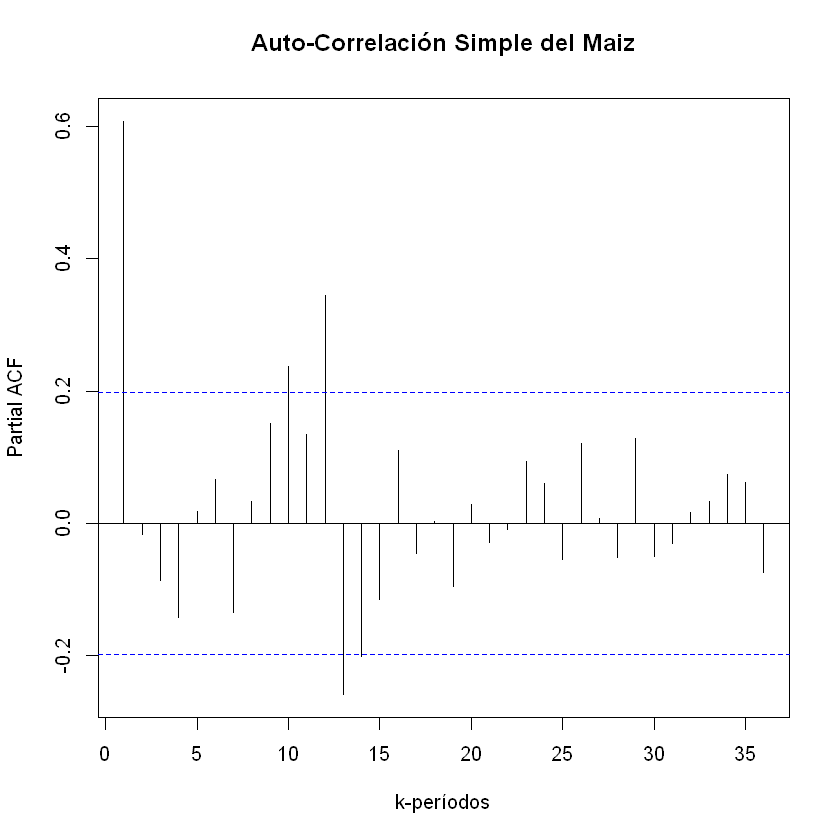

In [25]:
(pacf(ts(Maiz_ts), lag.max=36, 
     main = "Auto-Correlación Simple del Maiz",
xlab ="k-períodos"))

En este caso, es solamente conveniente tomar $k=1$ retraso para poder predecir mi futuro, ya que vemos que $\varphi _1=corr(Y_t,Y_{t-1})=0.608$, donde los demás valores ya están muy alejados de este valor, teniendo en cuenta que este tipo de auto-correlación no toma en cuenta los efectos intermedios que hay entre el intervalo $(t,t-k)$

<h2> 1.3.7 Medias Móviles </h2>

El método clásico de descomposición de series de tiempo se originó en la década de $1920$ y fue ampliamente utilizado hasta la década de $1950$. Todavía constituye la base de muchos métodos de descomposición de series temporales, por lo que es importante entender como funcionan. El primer paso en una descomposición clásica es usar un método de promedio móvil para estimar el ciclo de tendencia, por lo que comenzaremos analizando los promedios móviles.

<h3> 1.3.7.1 Suavizado de la media móvil centrado </h3>

Una media móvil de orden $m$ se puede escribir como:$$\hat{T}_t=\frac{1}{m}\sum _{j=-k}^{k}y_{t+j}$$ donde $m=2k+1$. Es decir, la estimación de la tendencia-ciclo en el momento $t$ se obtiene promediando los valores de la serie temporal dentro de $k$ períodos de $t$. También es probable que las observaciones que están cercanas en el tiempo tengan un valor cercano. Por lo tanto, el promedio elimina parte de la aleatoriedad en los datos, dejando un componente suave de ciclo-tendencia. A esto le llamamos $m$**-MA**, lo que significa un promedio móvil de orden $m$.

El orden de la media móvil determina la suavidad de la estimación del ciclo de tendencia. En general, un pedido más grande significa una curva más suave.

In [26]:
MM_Maiz # 5-MA ----> feb.2014= (1037733.6+841936.6+968867.5+1061894.8+1046361.4)/5

,MAÍZ,5-MA
ene. 2014,1037733.6,NA
feb. 2014,841936.6,NA
mar. 2014,968867.5,991358.8
abr. 2014,1061894.8,1027990.1
may. 2014,1046361.4,1081497.0
jun. 2014,1220890.4,1128519.4
jul. 2014,1109470.9,1148031.9
ago. 2014,1203979.7,1120058.1
sep. 2014,1159457.2,1064673.7
oct. 2014,906492.2,1045880.5


En la última comulna de esta tabla, se muestra una media móvil de orden $m=5$, que proporciona una estimación de la tendencia-ciclo. El primer valor de esta columna es el promedio de las primero $5$ observaciones, $ene.2014-mayo.2014$; el segundo valor en la columna **5-MA** es el promedio de los valores para $feb.2014-jun.2014$ y así sucesivamente.
Cada valor en la columna **5-MA** es el promedio de las observaciones en la ventana de $5$ meses centrada en el mes correspondiente. 

La columna **5-MA** cotniene los valores de $\hat{T}_t$ con $m=2k+1=5$ y $k=2$. No hay valores ni para los primeros dos años ni pra los dos últimos años, porque no tenemos observaciones en cada lado

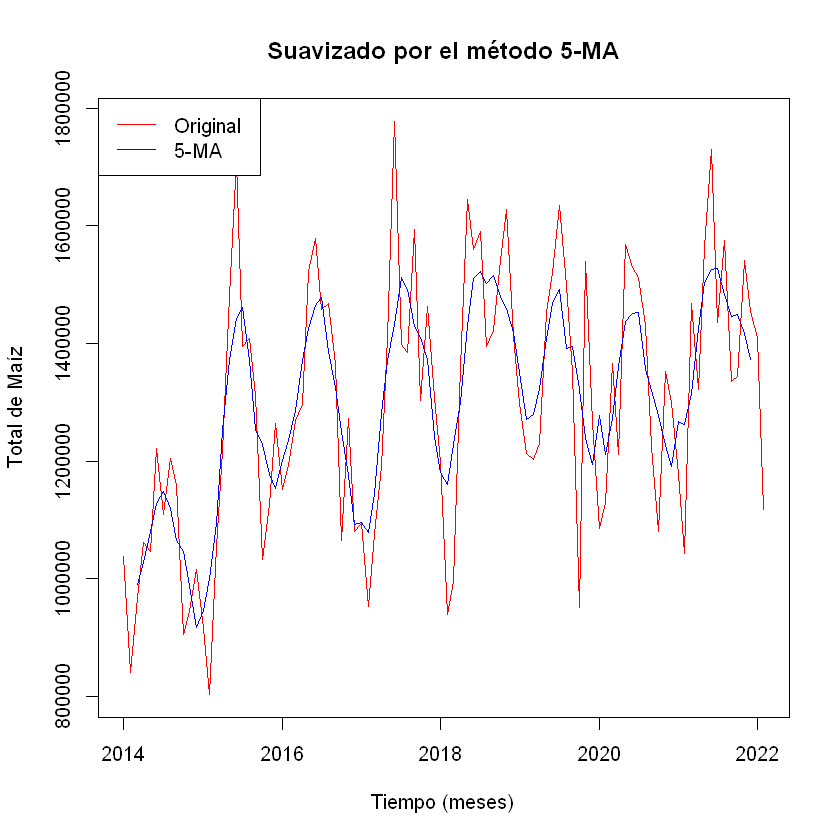

In [27]:
plot(Maiz_ts_y_5_MA, plot.type = "single",
                                                  col = c("red","blue"),lwd=1:1 , lty=1:1, ylab = "Total de Maíz",
                                                  xlab = "Tiempo (meses)", main = "Suavizado por el método 5-MA")
legend(x="topleft", legend =c("Original", "5-MA"),col =c("red", "blue"),lty=1:1) 




<h3> 1.3.7.2 Suavizado de la media móvil k períodos hacía atrás </h3>

El método de *Promedio Móvil Simple* utiliza información histórica del desempeño de la variable que se desea pronósticar para poder generar un pronóstico de la misma a futuro. Es decir, se considera válida la premisa que el *pasado* es de utilidad para predecir el *futuro*. Su notación matemática es de la siguiente forma: 
$$SMA=\frac{x_1+x_2+\cdots +x_n}{n}$$ donde $x_i$ son los valores de la variable, por tanto $SMA$ es un promedio aritmético de $k$ períodos atrás.

Dado que en la autocorrelación simple como en la parcial $\varphi _1$ dio casi cercano a $1$, entonces para aplicar el método de medias móviles hacemos $k=1$. Es decir: $Y_t=\frac{X_t+X_{t-1}}{2}$ para $t>1$

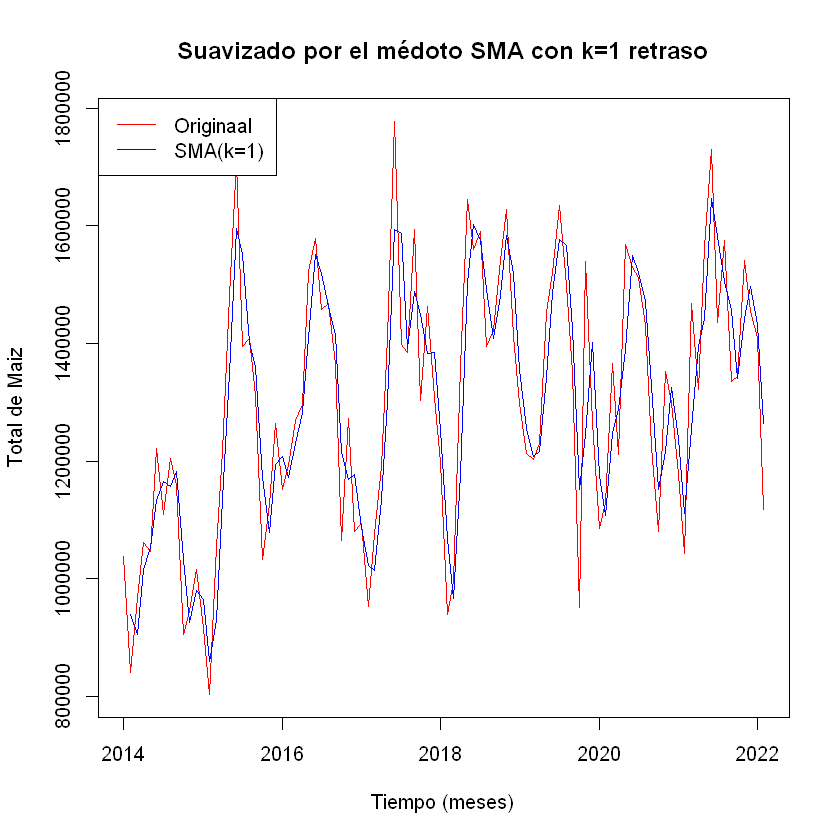

In [28]:
plot(Maiz_Suavizados, plot.type = "single", col = c("red", "blue"),
lwd=1:1, lty=1:1, ylab = "Total de Maiz", xlab="Tiempo (meses)",
main="Suavizado por el médoto SMA con k=1 retraso")
legend(x="topleft", legend=c("Originaal", "SMA(k=1)"),
       col = c("red", "blue"), lty=1:1)

Tenemos que $X_1=1037733.6$ ( Valor de toneladas netas en Enero/2014 ) y $X_2=841936.6$ ( Valor de toneladas netas en Febrero/2014 ), entonces dado lo anterior, tendremos que: $Y_2=\frac{X_2+X_1}{2}$, es decir, El valor predictor para Febrero/2014 ( $Y_2$ ) es $939,835.1$

<h3> 1.3.7.3 Suavizado por Método de Holt-Winters </h3>

En este método se toma en cuenta que contribuyen, como la **tendencia** y la **estacionalidad**, es decir, este método lleva a cabo un suavizado exponencial en la presencia de tendencias y estacionalidad. Utilizando el **packages forecast** para llevar a cabo este método.

In [29]:
Maiz_H_W  <- HoltWinters(Maiz_ts)
Maiz_H_W

Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = Maiz_ts)

Smoothing parameters:
 alpha: 0.2890066
 beta : 0.02799386
 gamma: 0.374021

Coefficients:
           [,1]
a   1517860.955
b      5992.591
s1  -131543.289
s2  -151243.472
s3   130452.879
s4   244259.239
s5   108864.905
s6   101431.949
s7   -23646.523
s8  -154553.453
s9    65965.856
s10  -74598.762
s11 -190997.612
s12 -357811.540

Con lo anterior, tenemos que la gráfica a través de este método nos queda de la siguiente manera:

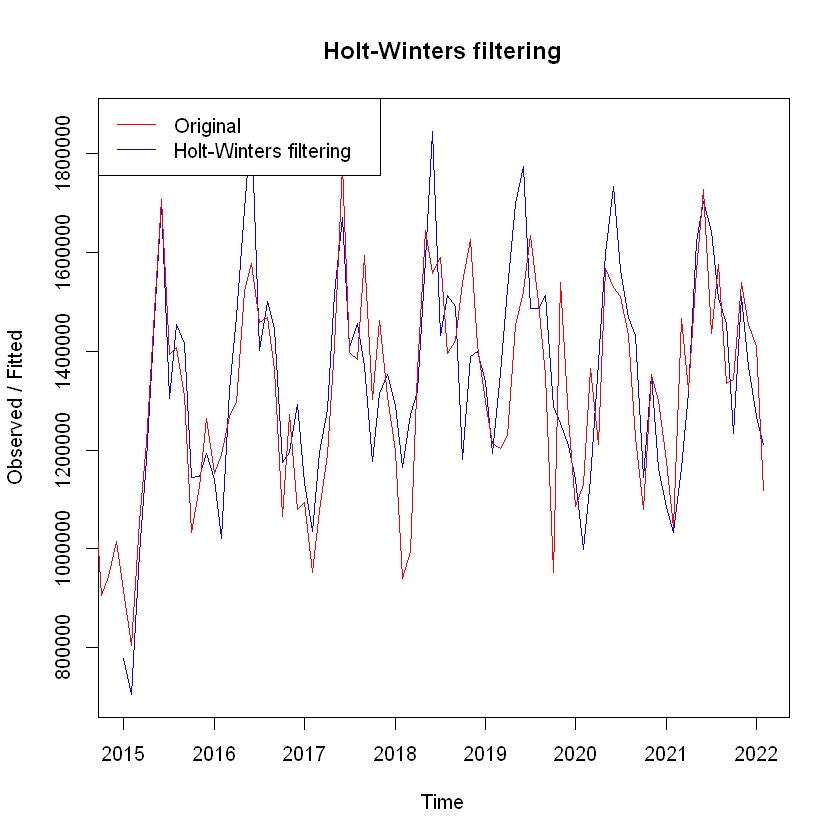

In [30]:
plot(Maiz_H_W, col = "red", col.predicted = "blue")
legend(x="topleft", 
       legend=c("Original", "Holt-Winters filtering"),
col = c("red", "blue"), lty=1:1)